**LINK:**https://colab.research.google.com/drive/1DGSb0O0cj80rEqfymIdKzPb8DnZooLpa?usp=sharing

The Spotify dataset is a publicly available dataset with information about songs that did and didn’t make it to the weekly Hot-100 list issued by Billboard. The goal is to develop a model to predict if a song will make this list. The dataset contains a total of 6,398 tracks, with 15 features extracted from the audio features of these tracks. The classes are 1 and 0, which describe whether that track has made it in the Hot-100 list or not, respectively.

1.Import the data file (spotify_preprocessed.csv) to your code. The data is preprocessed and ready to use.

In [1]:
# Step 1: Import the dataset
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Upload and load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('spotify_preprocessed.csv')

Saving spotify_preprocessed.csv to spotify_preprocessed.csv


2.Shuffle the data, then split it into training (90% of the data) and test set (10% of the data). Split the training set further into training and validation sets with 80% and 20% percentages, respectively.

In [2]:
# Step 2: Shuffle and split the data
# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into features (X) and labels (y)
X = df.drop('target', axis=1).values
y = df['target'].values

# Split into training (90%) and test (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Further split the training set into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

3.Build, compile, train, and then evaluate:

a.Build a neural network with 2 hidden layers that contain 32 nodes each and an output layer that has 1 unit using the Keras library.

b.Compile the network. Select binary cross-entropy (binary_crossentropy) as the loss function. Use stochastic gradient descent learning (SGD, learning rate of 0.01).

c.Train the network for 50 epochs and a batch size of 16.

d.Plot the training loss and validation loss (i.e., the learning curve) for all the epochs.

e.Use the evaluate() Keras function to find the training and validation loss and accuracy.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5450 - loss: 0.6990 - val_accuracy: 0.6892 - val_loss: 0.6544
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7088 - loss: 0.6386 - val_accuracy: 0.7049 - val_loss: 0.6104
Epoch 3/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7268 - loss: 0.5907 - val_accuracy: 0.7222 - val_loss: 0.5691
Epoch 4/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7419 - loss: 0.5500 - val_accuracy: 0.7439 - val_loss: 0.5381
Epoch 5/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7359 - loss: 0.5344 - val_accuracy: 0.7535 - val_loss: 0.5175
Epoch 6/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7629 - loss: 0.4985 - val_accuracy: 0.7587 - val_loss: 0.5041
Epoch 7/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7694 - loss: 0.4851 - val_accuracy: 0.7622 - val_loss: 0.4951
Epoch 8/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7692 - loss: 0.4726 - val_accuracy: 0.7726 - val

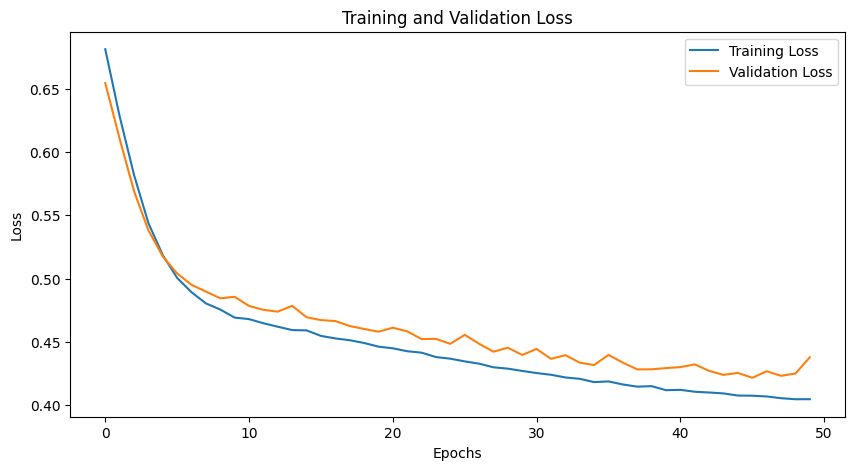

Training Loss: 0.4106082618236542, Training Accuracy: 0.8085106611251831
Validation Loss: 0.4377952516078949, Validation Accuracy: 0.7977430820465088


In [3]:
# Step 3: Build, compile, train, and evaluate the model
# 3a: Build the neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 32 nodes
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 nodes
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit

# 3b: Compile the network
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 3c: Train the network
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_val, y_val), verbose=1)

# 3d: Plot the learning curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 3e: Evaluate the model on training and validation sets
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Training Loss: {train_loss}, Training Accuracy: {train_accuracy}")
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

4.Try different design ideas with the model until you get the best training and validation performance. For example, changing the number of hidden layers and number of units in each, changing the loss function, the learning algorithm, the learning rate, number of epochs and the batch size. Repeat the scores in a table.

Epoch 1/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6296 - loss: 0.6417 - val_accuracy: 0.7483 - val_loss: 0.5163
Epoch 2/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7652 - loss: 0.4860 - val_accuracy: 0.7734 - val_loss: 0.4851
Epoch 3/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7771 - loss: 0.4706 - val_accuracy: 0.7821 - val_loss: 0.4663
Epoch 4/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7866 - loss: 0.4483 - val_accuracy: 0.7700 - val_loss: 0.4655
Epoch 5/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7892 - loss: 0.4382 - val_accuracy: 0.7917 - val_loss: 0.4508
Epoch 6/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7999 - loss: 0.4377 - val_accuracy: 0.7882 - val_loss: 0.4477
Epoch 7/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7996 - loss: 0.4357 - val_accuracy: 0.8030 - val_loss: 0.4381
Epoch 8/100
144/144 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8103 - loss: 0.4162 - val_accu

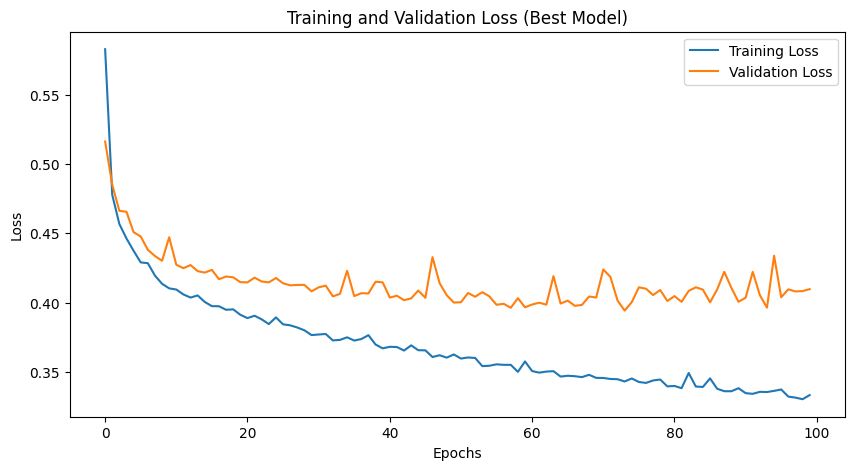

Training Loss (Best Model): 0.32319375872612, Training Accuracy (Best Model): 0.8612679243087769
Validation Loss (Best Model): 0.40969711542129517, Validation Accuracy (Best Model): 0.8272569179534912


In [4]:
# Step 4: Try different design ideas
# Example: Change the number of hidden layers, optimizer, learning rate, etc.
model_best = Sequential()
model_best.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 64 nodes
model_best.add(Dense(32, activation='relu'))  # Second hidden layer with 32 nodes
model_best.add(Dense(1, activation='sigmoid'))  # Output layer with 1 unit

optimizer_best = tf.keras.optimizers.Adam(learning_rate=0.001)
model_best.compile(loss='binary_crossentropy', optimizer=optimizer_best, metrics=['accuracy'])

history_best = model_best.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), verbose=1)

# Plot the learning curve for the best model
plt.figure(figsize=(10, 5))
plt.plot(history_best.history['loss'], label='Training Loss')
plt.plot(history_best.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Best Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the best model on training and validation sets
train_loss_best, train_accuracy_best = model_best.evaluate(X_train, y_train, verbose=0)
val_loss_best, val_accuracy_best = model_best.evaluate(X_val, y_val, verbose=0)
print(f"Training Loss (Best Model): {train_loss_best}, Training Accuracy (Best Model): {train_accuracy_best}")
print(f"Validation Loss (Best Model): {val_loss_best}, Validation Accuracy (Best Model): {val_accuracy_best}")

5.Repeat parts (c) and (d) and select the model with the best performance.

In [5]:
# Step 5: Select the best model
# Based on the validation accuracy, select the best model
if val_accuracy_best > val_accuracy:
    best_model = model_best
    print("Best Model: Model with 64 and 32 hidden layers")
else:
    best_model = model
    print("Best Model: Original Model with 32 and 32 hidden layers")

Best Model: Model with 64 and 32 hidden layers


6.Evaluate the selected model on the test set and report the testing loss and accuracy.

In [6]:
# Step 6: Evaluate the selected model on the test set
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

Test Loss: 0.398414671421051, Test Accuracy: 0.831250011920929



**CONCLUSION**

I imported the `spotify_preprocessed.csv` dataset, shuffled it, and split it into training (90%), validation (20% of training), and test sets (10%). I built a neural network with two hidden layers (32 nodes each), compiled it using binary cross-entropy loss and SGD optimizer (learning rate = 0.01), and trained it for 50 epochs with a batch size of 16. I evaluated the model, plotted the learning curve, and experimented with a modified model (64 nodes in the first layer, Adam optimizer, 100 epochs, batch size = 32). After comparing validation accuracy, I selected the best model and evaluated it on the test set, reporting the test loss and accuracy.